In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('train_loan.txt', index_col='Loan_ID')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data.shape

(614, 12)

In [84]:
data.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
data['Gender'] = pd.get_dummies(data.Gender)
data['Married'] = pd.get_dummies(data.Married)
data['Education'] = pd.get_dummies(data.Education)
data['Self_Employed'] = pd.get_dummies(data.Self_Employed)
data['Property_Area'] = pd.get_dummies(data.Property_Area)
data['Loan_Status'] = pd.get_dummies(data.Loan_Status)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0,1,0,1,1,5849,0.0,NaN,360.0,1.0,0,1
LP001003,0,0,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0
LP001005,0,0,0,1,0,3000,0.0,66.0,360.0,1.0,0,1
LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
LP001008,0,1,0,1,1,6000,0.0,141.0,360.0,1.0,0,1


In [117]:
data['Dependents'].replace({'3+': 4})

Loan_ID
LP001003    1
LP001005    0
LP001006    0
LP001008    0
LP001011    2
           ..
LP002978    0
LP002979    4
LP002983    1
LP002984    2
LP002990    0
Name: Dependents, Length: 517, dtype: object

In [118]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [119]:
data.dtypes

Gender                 uint8
Married                uint8
Dependents            object
Education              uint8
Self_Employed          uint8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          uint8
Loan_Status            uint8
dtype: object

In [120]:
#loan_mean = data['LoanAmount'].mean()
#loan_mean

In [121]:
#data['LoanAmount'].fillna(loan_mean)

In [122]:
data_clean = data.dropna()

In [123]:
data = data_clean.copy()

In [124]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [125]:
data['Gender'].value_counts()

0    424
1     93
Name: Gender, dtype: int64

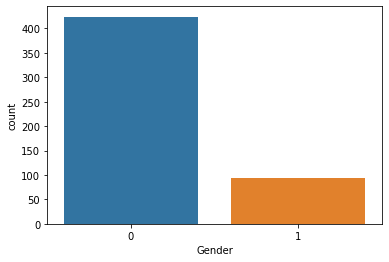

In [126]:
sns.countplot(x='Gender', data=data)
plt.show()

In [127]:
data['Married'].value_counts()

0    333
1    184
Name: Married, dtype: int64

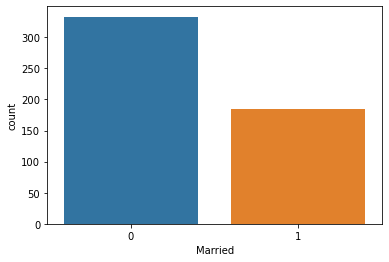

In [128]:
sns.countplot(x='Married', data=data)
plt.show()

In [129]:
data['Education'].value_counts()

1    424
0     93
Name: Education, dtype: int64

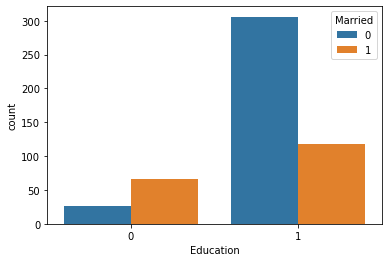

In [130]:
sns.countplot(x='Education', hue='Married', data=data)
plt.show()

In [131]:
data['Self_Employed'].value_counts()

1    423
0     94
Name: Self_Employed, dtype: int64

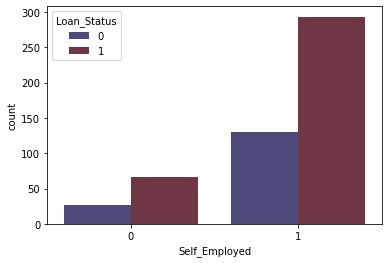

In [132]:
sns.countplot(x='Self_Employed', hue='Loan_Status', palette='icefire', data=data)
plt.show()

In [133]:
data['Property_Area'].value_counts()

0    364
1    153
Name: Property_Area, dtype: int64

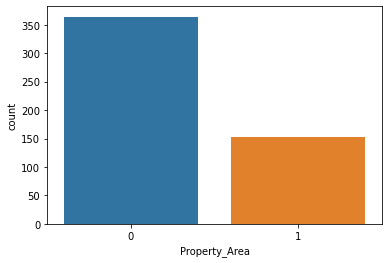

In [134]:
sns.countplot(x='Property_Area', data=data)
plt.show()

In [135]:
data['Loan_Status'].value_counts()

1    360
0    157
Name: Loan_Status, dtype: int64

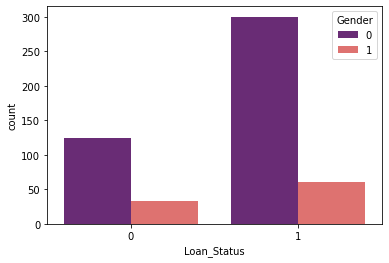

In [136]:
sns.countplot(x='Loan_Status', palette='magma',hue='Gender', data=data)
plt.show()

In [145]:
X =  data.drop(['Loan_Status','Dependents'], axis=1)
y = data[['Loan_Status']]
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001003,0,0,1,1,4583,1508.0,128.0,360.0,1.0,1
LP001005,0,0,1,0,3000,0.0,66.0,360.0,1.0,0
LP001006,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0
LP001008,0,1,1,1,6000,0.0,141.0,360.0,1.0,0
LP001011,0,0,1,0,5417,4196.0,267.0,360.0,1.0,0


In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)
len(X_train)

346

In [158]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\Yegon Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [163]:
from sklearn.tree import DecisionTreeClassifier

lin_reg = DecisionTreeClassifier()
lin_reg.fit(X_train,y_train)

DecisionTreeClassifier()

In [164]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [165]:
print(log_reg.score(X_test,y_test)
print(lin_reg.score(X_test,y_test))

0.8538011695906432
0.7426900584795322
